<a href="https://colab.research.google.com/github/zhenglinchen1096496/DBU-Python/blob/main/HW_Kmeans_Zhenglin_Chen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instructions

In this notebook, you will complete code only in cells below the comment `### YOUR SOLUTION HERE`.  You will add your relevant code in cells below the comment, and no where else.

For example, you would complete the code cell below as follows:
```
# Write code to print "Hello"
### YOUR SOLUTION HERE
print("Hello")
```

Once you have completed your code, you can test your code by running the test cell which contains a comment that looks like this:
```
# Tests 5 points: Printing "Hello"
```

**Do not change any parts of this notebook aside from adding code below the cells in the notebook with `### YOUR SOLUTION HERE`.**  Changing unauthorized parts of the notebook could result in a zero for the assignment.

In this notebook, proceed step by step.  Do not move on to the next section until you have successfully completed all of the prior sections.

You can see a video demo of this tool at the following link:

https://youtu.be/yvLWbpgnspM?si=oeUEICnxrC0Ysbjb&t=143

# Step 1
Run the cells below

In [ ]:
# Import libraries and set constants
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, normalized_mutual_info_score
from sklearn.metrics import adjusted_rand_score, classification_report, confusion_matrix, f1_score
import seaborn as sns
import pandas as pd

RANDOM_STATE = 23


In [ ]:
# Load the Iris dataset
iris = datasets.load_iris()

# Place in dataframe and examine data
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['target'] = iris.target  # Add the target column
data['target_names'] = data['target'].apply(lambda x: iris.target_names[x]) # add target names
data.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [ ]:
# Assign features and targets
X_features = iris.data
Y_target = iris.target


# Step 2

## Step 2a - Your code
Standardize the feature data using the `StandardScaler` from `sklearn` and save in `X_features`.

In [ ]:
# Standardize the data below
### YOUR SOLUTION HERE
X_features = StandardScaler().fit_transform(X_features)



In [ ]:
# def plot_feature_vs_feature(ax, features, target=None, feature_index1=0, feature_index2=1, title="Feature 2 vs Feature 1", xlabel= "Feature 1", ylabel="Feature 2"):
#     """
#     Plots a scatter plot on a given axes.

#     Args:
#         ax (matplotlib.axes.Axes): The axes object to plot on.
#         features (np.ndarray): The feature data (2 columns).
#         target (np.ndarray): The target labels or clusters.
#         title (str): The plot title.
#         xlabel (str): Label for the x-axis.
#         ylabel (str): Label for the y-axis.

#     """
#     scatter = ax.scatter(features[:, feature_index1], features[:, feature_index2], c=target, cmap='viridis', edgecolor='k')
#     ax.set_title(title)
#     ax.set_xlabel(xlabel)
#     ax.set_ylabel(ylabel)
#     ax.set_xticks([])
#     ax.set_yticks([])
#     legend = ax.legend(*scatter.legend_elements())
#     ax.add_artist(legend)


In [ ]:
# # Visualize the clustered data (PCA for 2D visualization)
# from sklearn.decomposition import PCA
# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(X_features)

# # Plots of PCA 2 vs PCA 1
# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(X_features)
# # Plots of Feature 2 vs Feature 1
# fig, axes = plt.subplots(1, 1, figsize=(8, 6))
# plot_feature_vs_feature(axes, X_pca, title="PCA K-Means Clustering", xlabel="Principal Component 1", ylabel="Principal Component 2")
# plt.show()

In [ ]:
# Non-graded feedback on your code
if X_features.shape != (150, 4): print("The shape of X_features is incorrect.")

## Step 2b - Instructor grading code in the cell below

In [ ]:
# Tests 5 points: Testing data loading and standardization
print("Starting hidden tests...")
print("Hidden tests complete.")

Starting hidden tests...
Hidden tests complete.


# Step 3

## Step 3a - Your code

Determine the optimal number of clusters (K) using a combination of the Elbow method, silhouette score, and Davies-Bouldin score.

Save your best silhouette score, best Davies-Bouldin score, and optimal value of K in the variables provided.

While determining these, make sure to set `random_state=RANDOM_STATE` when performing K-means.

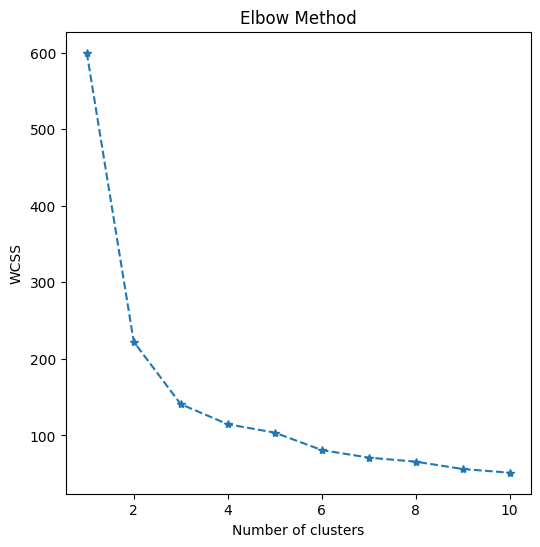

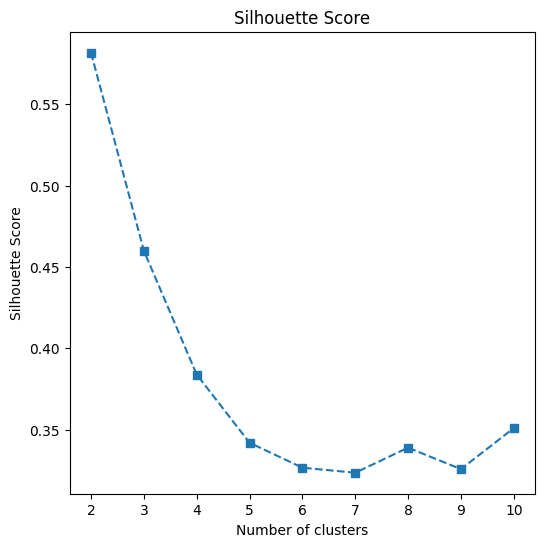


Best Silhouette Score: 0.5817500491982808
Optimal K based on Silhouette Score: 2




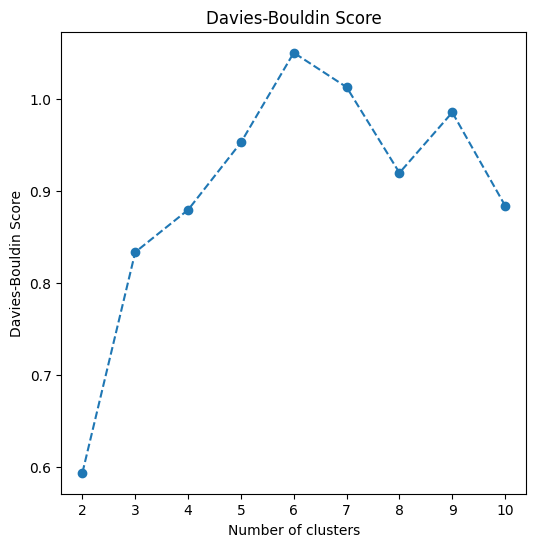


Best Davies-Bouldin Score: 0.5933126905762435
Optimal K based on Davies-Bouldin Score: 2



Best Silhouette Score: 0.5817500491982808
Best Davies-Bouldin Score: 0.5933126905762435
Optimal K: 2


In [ ]:
# Variables to hold your best silhouette score, Davies-Bouldin score, and optimal number of clusters K
best_silhouette_score = None
best_davies_bouldin_score = None
K = None


### YOUR SOLUTION HERE


# Using Elbow method
wcss = []  # Within-cluster sum of squares
# Perform Kmeans for K=1 to 11
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=RANDOM_STATE)
    kmeans.fit(X_features)
    wcss.append(kmeans.inertia_)


# Plot the Elbow method
plt.figure(figsize=(6, 6))
plt.plot(range(1, 11), wcss, marker='*', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


print("\n")

# Using Silhouette coefficient
silhouette_scores = []
# Perform Kmeans for K=2 to 11, since silhouette score requires K>=2
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=RANDOM_STATE)
    kmeans.fit(X_features)
    silhouette_scores.append(silhouette_score(X_features, kmeans.labels_))

# Plot Silhouette scores
plt.figure(figsize=(6, 6))
plt.plot(range(2, 11), silhouette_scores, marker='s', linestyle='--')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Find the optimal K based on silhouette score
best_silhouette_score = max(silhouette_scores)
print(f"\nBest Silhouette Score: {best_silhouette_score}")
optimal_k_silhouette = range(2, 11)[np.argmax(best_silhouette_score)]
print(f"Optimal K based on Silhouette Score: {optimal_k_silhouette}")


print("\n")

# Using Davies-Bouldin index
davies_bouldin_scores = []

# Perform Kmeans for K=2 to 11, since Davies-Bouldin scores requires K>=2
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=RANDOM_STATE)
    kmeans.fit(X_features)
    davies_bouldin_scores.append(davies_bouldin_score(X_features, kmeans.labels_))

# Plot the Davies-Bouldin scores
plt.figure(figsize=(6, 6))
plt.plot(range(2, 11), davies_bouldin_scores, marker='o', linestyle='--')
plt.title('Davies-Bouldin Score')
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Bouldin Score')
plt.show()

# Find the optimal K based on Davies-Bouldin score
best_davies_bouldin_score = min(davies_bouldin_scores)
print(f"\nBest Davies-Bouldin Score: {best_davies_bouldin_score}")
optimal_k_davies_bouldin = range(2, 11)[np.argmin(davies_bouldin_scores)]
print(f"Optimal K based on Davies-Bouldin Score: {optimal_k_davies_bouldin}")

print("\n")

if optimal_k_silhouette == optimal_k_davies_bouldin:
    K = optimal_k_silhouette
else:
    K = (optimal_k_silhouette + optimal_k_davies_bouldin) // 2
    print(f"Optimal K based on both methods: {K}")

### YOUR SOLUTION ABOVE HERE


print(f"\nBest Silhouette Score: {best_silhouette_score}")
print(f"Best Davies-Bouldin Score: {best_davies_bouldin_score}")
print(f"Optimal K: {K}")


In [ ]:
# Non-graded feedback on your code
if best_silhouette_score != 0.5817500491982808: "Best silhouette score is incorrect."
if best_davies_bouldin_score != 0.5933126905762435: "Best Davies-Bouldin score is incorrect."

## Step 3b - Instructor grading code in the cell below

In [ ]:
# Tests 15 points: Testing process of finding optimal value for K
print("Starting hidden tests...")
print("Hidden tests complete.")

Starting hidden tests...
Hidden tests complete.


# Step 4

## Step 4a - Your code
Use K-means with your determined optimal number of clusters `K` to assign cluster labels to data. Save your cluster labels in `Y_clusters`.

For `Kmeans`, make sure to include the following arguments:
*   Set the number of clusters to your optimal K
*   `random_state=RANDOM_STATE`

You may use the default values for the rest of the arguments to `kmeans`.


In [ ]:
# Variable to hold your cluster labels from K-means
Y_clusters = None

### YOUR SOLUTION HERE
K=optimal_k_silhouette
kmeans = KMeans(n_clusters=K, random_state=RANDOM_STATE)
kmeans.fit(X_features)
Y_clusters = kmeans.labels_


In [ ]:
# Non-graded feedback on your code
if Y_clusters[7] != 1: print("Cluster labels are incorrect.")
if Y_clusters[17] != 1: print("Cluster labels are incorrect.")
if Y_clusters[57] != 0: print("Cluster labels are incorrect.")
if Y_clusters[37] != 1: print("Cluster labels are incorrect.")

## Step 4b - Instructor grading code in the cell below

In [ ]:
# Tests 5 points: Testing cluster labels
print("Starting hidden tests...")
print("Hidden tests complete.")

Starting hidden tests...
Hidden tests complete.


# Step 5

## Step 5a - Your code

Evaluate the clustering by computing the external performance metrics of ARI, NMI, and F1-Score.  Save the value for each metric in the provided variable.

In [ ]:
# The labels for clusters (Y_clusters) do not automatically align with the labels in Y_target, so the code below aligns the labels
# If you want to see the incorrect mapping, comment out the line Y_clusters = align_...
# Remap cluster labels to align with true labels
def align_cluster_labels_confusion_matrix(kmeans_labels, Y_target):
    cm = confusion_matrix(Y_target, kmeans_labels)
    mapping = np.argmax(cm, axis=0)  # Find the max value in each column of the confusion matrix
    aligned_labels = np.array([mapping[label] for label in kmeans_labels])  # Apply mapping to kmeans_labels
    return aligned_labels

Y_clusters = align_cluster_labels_confusion_matrix(Y_clusters, Y_target)


# Variables to hold your external performance metrics
ari = None
nmi = None
f1 = None

### YOUR SOLUTION HERE
ari = adjusted_rand_score(Y_target, Y_clusters)
nmi = normalized_mutual_info_score(Y_target, Y_clusters)
f1 = f1_score(Y_target, Y_clusters, average='weighted')
### YOUR SOLUTION ABOVE HERE


print('Adjusted Rand Index (ARI) =', ari)
print('Normalized Mutual Information (NMI) =', nmi)
print('F1-Score =', f1)


Adjusted Rand Index (ARI) = 0.5681159420289855
Normalized Mutual Information (NMI) = 0.7336804366512104
F1-Score = 0.5555555555555555


In [ ]:
# Non-graded feedback on your code
if ari != 0.5681159420289855: print("ARI value is incorrect.")

## Step 5b - Instructor grading code in the cell below

In [ ]:
# Tests 10 points: Testing external performance metrics
print("Starting hidden tests...")
print("Hidden tests complete.")

Starting hidden tests...
Hidden tests complete.


#Step 6

#Step 6a - Examine visualizations of external performance metrics

In [ ]:
def plot_confusion_matrix(conf_matrix, title='Confusion matrix', cmap='Blues'):
    '''
    Given a sklearn confusion matrix (cm), make a nice plot.
    '''
    # Plot the confusion matrix
    plt.figure(figsize=(conf_matrix.shape[1], conf_matrix.shape[0]))  # Adjust figure size as needed.
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=cmap, cbar=False,
                xticklabels=np.arange(conf_matrix.shape[1]),  # Use matrix shape for labels
                yticklabels=np.arange(conf_matrix.shape[0]))  # Use matrix shape for labels
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()


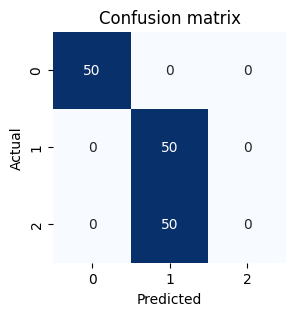

In [ ]:
#Confusion Matrix
conf_matrix = confusion_matrix(Y_target, Y_clusters)
plot_confusion_matrix(conf_matrix)



In [ ]:
# Classification Report
print(classification_report(Y_target, Y_clusters))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.50      1.00      0.67        50
           2       0.00      0.00      0.00        50

    accuracy                           0.67       150
   macro avg       0.50      0.67      0.56       150
weighted avg       0.50      0.67      0.56       150



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:

def plot_feature_vs_feature(ax, features, target=None, feature_index1=0, feature_index2=1, title="Feature 2 vs Feature 1", xlabel= "Feature 1", ylabel="Feature 2"):
    """
    Plots a scatter plot on a given axes.

    Args:
        ax (matplotlib.axes.Axes): The axes object to plot on.
        features (np.ndarray): The feature data (2 columns).
        target (np.ndarray): The target labels or clusters.
        title (str): The plot title.
        xlabel (str): Label for the x-axis.
        ylabel (str): Label for the y-axis.

    """
    scatter = ax.scatter(features[:, feature_index1], features[:, feature_index2], c=target, cmap='viridis', edgecolor='k')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xticks([])
    ax.set_yticks([])
    legend = ax.legend(*scatter.legend_elements())
    ax.add_artist(legend)

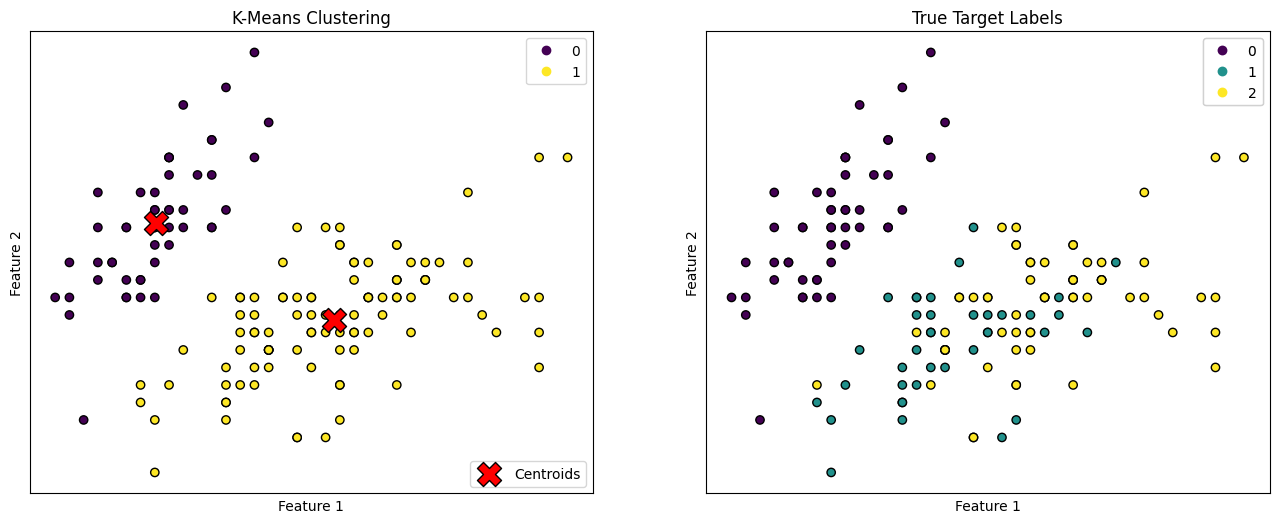

In [ ]:
# Plots of Feature 2 vs Feature 1
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
plot_feature_vs_feature(axes[0], X_features, Y_clusters, title="K-Means Clustering")
axes[0].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', edgecolors='k', label='Centroids')
axes[0].legend(loc="lower right")
plot_feature_vs_feature(axes[1], X_features, Y_target, title="True Target Labels")
plt.show()

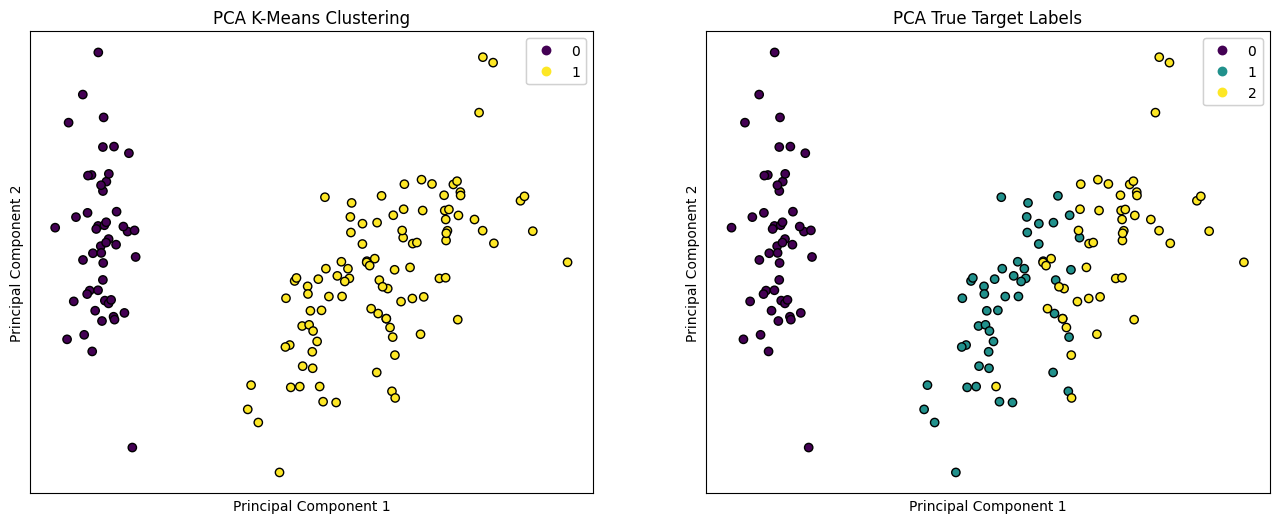

In [ ]:
from sklearn.decomposition import PCA

# Plots of PCA 2 vs PCA 1
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_features)
# Plots of Feature 2 vs Feature 1
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
plot_feature_vs_feature(axes[0], X_pca, Y_clusters, title="PCA K-Means Clustering", xlabel="Principal Component 1", ylabel="Principal Component 2")
plot_feature_vs_feature(axes[1], X_pca, Y_target, title="PCA True Target Labels", xlabel="Principal Component 1", ylabel="Principal Component 2")
plt.show()

# Step 7 - Analysis

##What do you conclude about the performance of Kmeans on the Iris dataset?  What factors about the data contributed to its performance?

YOUR ANSWER HERE:
K-means does not perform very well on the Iris dataset.
Because many of the characteristics of Iris versicolor and Iris virginica are so similar to each other which makes difficult to tell the two types apart in K-means. So, in the graphs given by the Davis-Bouldin index and the Silhouette coefficient, Optimal K is 2, not 3.

It is the petal length and petal width of the data that contributed to its performance. These two features overlap significantly between Iris versicolor and Iris virginica.
